<a href="https://colab.research.google.com/github/juanpalominoh/Fundamentos-de-Econometria/blob/main/Tema_1_Web_Scraping_sobre_temblores_en_Per%C3%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping para descargar datos de temblores recientes en Perú**

### Instalar paquetes

In [ ]:
# Instalar paquetes
install.packages("lubridate")
install.packages("rvest", dependencies = T)
install.packages("glue")
install.packages("xml2")
install.packages("stringr")
install.packages("dplyr")
install.packages("ggplot2")
install.packages("tidytext")

# Llamar librerias
library(glue)
library(rvest)
library(xml2)
library(stringr)
library(dplyr)
library(tidyverse)
library(lubridate)
library(ggplot2)
library(tidytext)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘Rcpp’, ‘rex’, ‘hunspell’, ‘covr’, ‘repurrrsive’, ‘spelling’, ‘webfakes’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SnowballC’, ‘janeaustenr’, ‘tokenizers’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked fro

# 2. Web Scraping earthquakes
La información se extrae de la siguiente página:
https://www.emsc-csem.org/Earthquake/world/M4/

In [ ]:
# Descargar varias paginas del sitio web de terremotos mayor a 4 grados
walk(.x = 1:200,
      .f = ~ {
        download_html(
          url  = glue("https://www.emsc-csem.org/Earthquake/world/M4/?view={.x}"),
          file = glue("earthquakes_{.x}.html"))
      })

Se crea una función para extraer un registro histórico de terremotos de cada página web y luego recopilarla en una sola tabla

In [ ]:
# Función personalizada
f_procesar_sitio <- function(file){
  web <- xml2::read_html(file, encoding = "UTF-8")
  
  # Latitud
  latitude <- web %>%
    html_nodes(".tabev6+ .tabev1") %>%
    html_text

  # Longitud
  longitude <- web %>%
    html_nodes(".tabev2+ .tabev1") %>%
    html_text

  # Dirección Latitud
  latdeg <- web %>%
    html_nodes(".tabev2:nth-child(6)") %>%
    html_text

  # Dirección Longitud
  londeg <- web %>%
    html_nodes(".tabev2~ .tabev1+ .tabev2") %>%
    html_text
  
  # Magnitud
  magnitud <- NA
  for (i in 1:length(londeg)) {
    j <- i-1
    magnitud[i] <- web %>%
      html_nodes(paste0("#magtyp",j,"+ .tabev2")) %>%
      html_text
  }
  
  # Region
  region <- NA
  for (i in 1:length(londeg)) {
    j <- i-1
    region[i] <- web %>%
      html_nodes(paste0("#reg",j)) %>%
      html_text
  }

  # Fecha
  fecha <- web %>%
    html_nodes(".tabev6") %>%
    html_text
  fecha
  
  # Creando date and time from fecha
  date <- substring(str_remove(fecha, pattern="earthquake"), first=1, last=10)
  time <- substring(str_remove(fecha, pattern="earthquake"), first=14, last=21)
  
    # Tabla
  df_info <- tibble(
    hour = as.POSIXct(paste(date, time), format="%Y-%m-%d %H:%M:%S"),
    latitud = latitude,
    gr_lat  =latdeg,
    longitud=longitude,
    gr_lon  =londeg,
    magnitude=magnitud,
    regions  =region
  )
  
  return(df_info)
}

In [ ]:
# Listar los archivos earthquakes
archivos <- list.files("/content", full.names = F, pattern = "earthquakes*")
archivos

[1] "earthquakes_1.html"   "earthquakes_10.html"  "earthquakes_100.html"
  [4] "earthquakes_101.html" "earthquakes_102.html" "earthquakes_103.html"
  [7] "earthquakes_104.html" "earthquakes_105.html" "earthquakes_106.html"
 [10] "earthquakes_107.html" "earthquakes_108.html" "earthquakes_109.html"
 [13] "earthquakes_11.html"  "earthquakes_110.html" "earthquakes_111.html"
 [16] "earthquakes_112.html" "earthquakes_113.html" "earthquakes_114.html"
 [19] "earthquakes_115.html" "earthquakes_116.html" "earthquakes_117.html"
 [22] "earthquakes_118.html" "earthquakes_119.html" "earthquakes_12.html" 
 [25] "earthquakes_120.html" "earthquakes_121.html" "earthquakes_122.html"
 [28] "earthquakes_123.html" "earthquakes_124.html" "earthquakes_125.html"
 [31] "earthquakes_126.html" "earthquakes_127.html" "earthquakes_128.html"
 [34] "earthquakes_129.html" "earthquakes_13.html"  "earthquakes_130.html"
 [37] "earthquakes_131.html" "earthquakes_132.html" "earthquakes_133.html"
 [40] "earthquakes_134.html" "earthquakes_135.html" "earthquakes_136.html"
 [43] "earthquakes_137.html" "earthquakes_138.html" "earthquakes_139.html"
 [46] "earthquakes_14.html"  "earthquakes_140.html" "earthquakes_141.html"
 [49] "earthquakes_142.html" "earthquakes_143.html" "earthquakes_144.html"
 [52] "earthquakes_145.html" "earthquakes_146.html" "earthquakes_147.html"
 [55] "earthquakes_148.html" "earthquakes_149.html" "earthquakes_15.html" 
 [58] "earthquakes_150.html" "earthquakes_151.html" "earthquakes_152.html"
 [61] "earthquakes_153.html" "earthquakes_154.html" "earthquakes_155.html"
 [64] "earthquakes_156.html" "earthquakes_157.html" "earthquakes_158.html"
 [67] "earthquakes_159.html" "earthquakes_16.html"  "earthquakes_160.html"
 [70] "earthquakes_161.html" "earthquakes_162.html" "earthquakes_163.html"
 [73] "earthquakes_164.html" "earthquakes_165.html" "earthquakes_166.html"
 [76] "earthquakes_167.html" "earthquakes_168.html" "earthquakes_169.html"
 [79] "earthquakes_17.html"  "earthquakes_170.html" "earthquakes_171.html"
 [82] "earthquakes_172.html" "earthquakes_173.html" "earthquakes_174.html"
 [85] "earthquakes_175.html" "earthquakes_176.html" "earthquakes_177.html"
 [88] "earthquakes_178.html" "earthquakes_179.html" "earthquakes_18.html" 
 [91] "earthquakes_180.html" "earthquakes_181.html" "earthquakes_182.html"
 [94] "earthquakes_183.html" "earthquakes_184.html" "earthquakes_185.html"
 [97] "earthquakes_186.html" "earthquakes_187.html" "earthquakes_188.html"
[100] "earthquakes_189.html" "earthquakes_19.html"  "earthquakes_190.html"
[103] "earthquakes_191.html" "earthquakes_192.html" "earthquakes_193.html"
[106] "earthquakes_194.html" "earthquakes_195.html" "earthquakes_196.html"
[109] "earthquakes_197.html" "earthquakes_198.html" "earthquakes_199.html"
[112] "earthquakes_2.html"   "earthquakes_20.html"  "earthquakes_200.html"
[115] "earthquakes_21.html"  "earthquakes_22.html"  "earthquakes_23.html" 
[118] "earthquakes_24.html"  "earthquakes_25.html"  "earthquakes_26.html" 
[121] "earthquakes_27.html"  "earthquakes_28.html"  "earthquakes_29.html" 
[124] "earthquakes_3.html"   "earthquakes_30.html"  "earthquakes_31.html" 
[127] "earthquakes_32.html"  "earthquakes_33.html"  "earthquakes_34.html" 
[130] "earthquakes_35.html"  "earthquakes_36.html"  "earthquakes_37.html" 
[133] "earthquakes_38.html"  "earthquakes_39.html"  "earthquakes_4.html"  
[136] "earthquakes_40.html"  "earthquakes_41.html"  "earthquakes_42.html" 
[139] "earthquakes_43.html"  "earthquakes_44.html"  "earthquakes_45.html" 
[142] "earthquakes_46.html"  "earthquakes_47.html"  "earthquakes_48.html" 
[145] "earthquakes_49.html"  "earthquakes_5.html"   "earthquakes_50.html" 
[148] "earthquakes_51.html"  "earthquakes_52.html"  "earthquakes_53.html" 
[151] "earthquakes_54.html"  "earthquakes_55.html"  "earthquakes_56.html" 
[154] "earthquakes_57.html"  "earthquakes_58.html"  "earthquakes_59.html" 
[157] "earthquakes_6.html"   "earthquakes_60.html"  "earthquakes_61.html" 
[160] "earthquakes_62.html"

In [ ]:
# Se construye la base de datos de earthquake
df_earthquake <- map_dfr(.x = archivos,
                  .f = ~ {
                  f_procesar_sitio(.x)
                  })
                  
df_earthquake <- df_earthquake %>% 
            arrange(desc(hour)) %>%
            mutate(magnitude=as.numeric(magnitude))
df_earthquake <- unique(df_earthquake)

In [ ]:
# Filtrar regiones hispanohablantes, días, y magnitudes
peru <- df_earthquake %>%
        filter(grepl('PERU', regions)) %>%
        mutate(hour=hour-(5*60*60))
peru

hour,latitud,gr_lat,longitud,gr_lon,magnitude,regions
<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
2022-08-26 20:42:48,12.52,S,77.08,W,3.6,NEAR COAST OF CENTRAL PERU
2022-08-26 17:19:41,16.82,S,71.30,W,3.8,SOUTHERN PERU
2022-08-26 11:36:55,15.10,S,70.61,W,4.2,SOUTHERN PERU
2022-08-26 04:26:28,12.50,S,77.11,W,3.8,NEAR COAST OF CENTRAL PERU
2022-08-25 07:29:22,4.85,S,80.84,W,3.7,PERU-ECUADOR BORDER REGION
2022-08-25 02:48:20,13.89,S,71.73,W,3.6,CENTRAL PERU
2022-08-24 23:57:33,13.78,S,72.79,W,3.5,CENTRAL PERU
2022-08-24 23:29:05,15.61,S,71.75,W,3.6,SOUTHERN PERU
2022-08-24 23:26:59,13.81,S,72.72,W,3.5,CENTRAL PERU


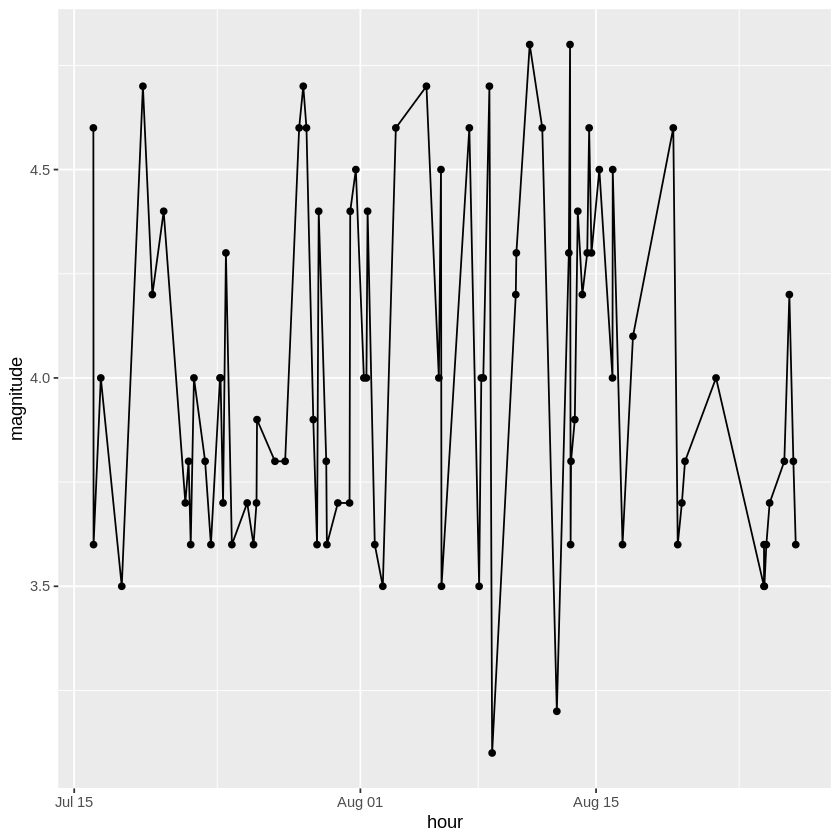

In [ ]:
# Gráfico de sismos para Peru
ggplot(peru, aes(x = hour, y = magnitude)) +
geom_line() + geom_point()